   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


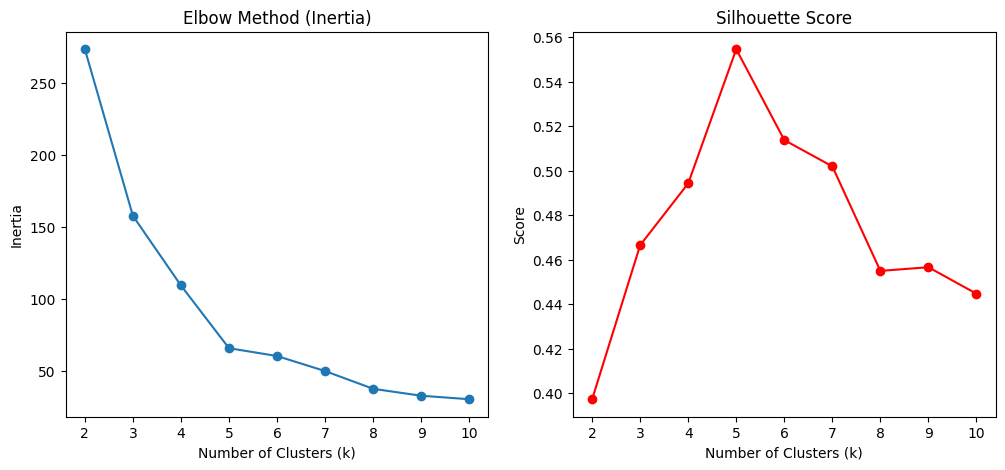

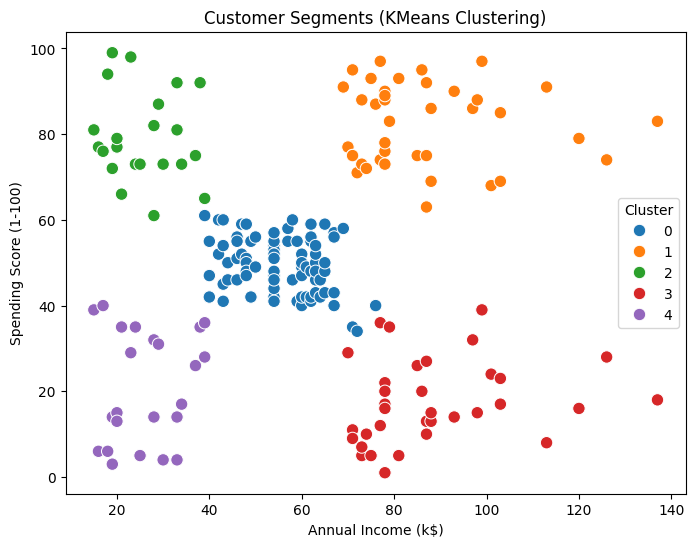

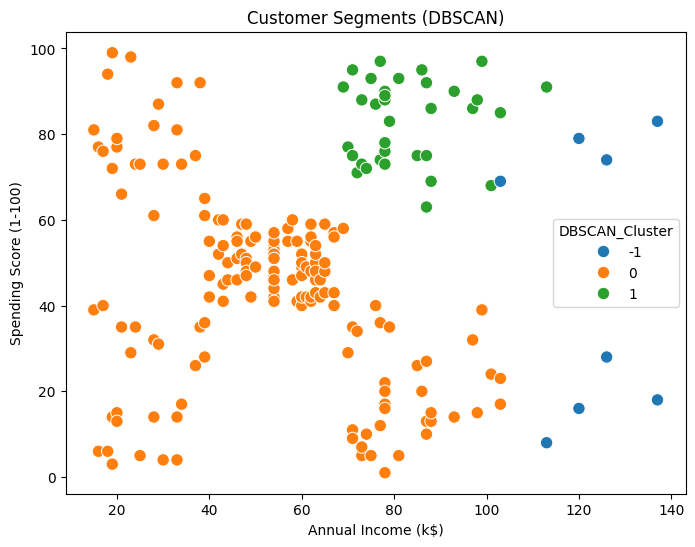

Average Spending per Cluster:
 Cluster
0    49.518519
1    82.128205
2    79.363636
3    17.114286
4    20.913043
Name: Spending Score (1-100), dtype: float64


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# ----------------------------
# 1. Load Dataset
# ----------------------------
# Agar file Excel (.xlsx) hai
df = pd.read_csv("/content/mall.csv - Mall_Customers.csv")

print(df.head())

print(df.head())

# ----------------------------
# 2. Select Features (Income & Spending Score)
# ----------------------------
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# ----------------------------
# 3. Scaling
# ----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ----------------------------
# 4. Optimal K (Elbow Method)
# ----------------------------
inertia = []
silhouette = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Elbow
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method (Inertia)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")

plt.subplot(1,2,2)
plt.plot(K, silhouette, marker='o', color='red')
plt.title("Silhouette Score")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Score")

plt.show()

# ----------------------------
# 5. Apply K-Means with chosen k (let’s say 5)
# ----------------------------
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# ----------------------------
# 6. Visualize Clusters
# ----------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    hue=df['Cluster'],
    palette='tab10',
    s=80
)
plt.title("Customer Segments (KMeans Clustering)")
plt.show()

# ----------------------------
# 7. Bonus: Try DBSCAN
# ----------------------------
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['Annual Income (k$)'],
    y=df['Spending Score (1-100)'],
    hue=df['DBSCAN_Cluster'],
    palette='tab10',
    s=80
)
plt.title("Customer Segments (DBSCAN)")
plt.show()

# ----------------------------
# 8. Analyze average spending per cluster
# ----------------------------
avg_spending = df.groupby('Cluster')['Spending Score (1-100)'].mean()
print("Average Spending per Cluster:\n", avg_spending)
